In [1]:
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb

In [2]:
df = pd.read_csv('data.csv')
df

,text,speaker,label
0,Says the Annies List political group supports ...,dwayne-bohac,false
1,When did the decline of coal start? It started...,scott-surovell,half-true
2,The economic turnaround started at the end of ...,charlie-crist,half-true
3,The Chicago Bears have had more starting quart...,robin-vos,true
4,Jim Dunnam has not lived in the district he re...,republican-party-texas,barely-true
...,...,...,...
17659,"In recent years, Rep. LaTourette has sponsored...",Bill O'Neill,pants-fire
17660,"91 percent of Latinos support the DREAM Act, w...",Presente.org,true
17661,Rep. Adam Putnam was silent when Rush Limbaugh...,Presente.org,false
17662,Elorza wants to teach our public school childr...,Local 799 of the International Assoc. of Fire ...,pants-fire


In [3]:
df = df.drop_duplicates(keep='last', ignore_index=True)
df = df.dropna()
df = df.reset_index(drop=True)

In [4]:
df

,text,speaker,label
0,Says the Annies List political group supports ...,dwayne-bohac,false
1,When did the decline of coal start? It started...,scott-surovell,half-true
2,The economic turnaround started at the end of ...,charlie-crist,half-true
3,The Chicago Bears have had more starting quart...,robin-vos,true
4,Jim Dunnam has not lived in the district he re...,republican-party-texas,barely-true
...,...,...,...
17657,"In recent years, Rep. LaTourette has sponsored...",Bill O'Neill,pants-fire
17658,"91 percent of Latinos support the DREAM Act, w...",Presente.org,true
17659,Rep. Adam Putnam was silent when Rush Limbaugh...,Presente.org,false
17660,Elorza wants to teach our public school childr...,Local 799 of the International Assoc. of Fire ...,pants-fire


Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

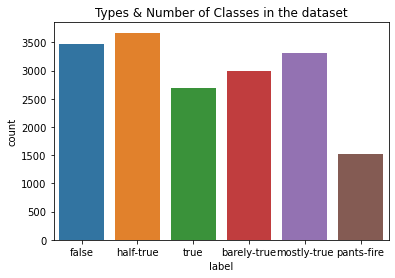

In [5]:
sns.countplot(x='label',data=df)
plt.title('Types & Number of Classes in the dataset')

In [6]:
df['label'].value_counts()

half-true      3673
false          3464
mostly-true    3320
barely-true    2990
true           2696
pants-fire     1519
Name: label, dtype: int64

## SPEAKER EDA

In [7]:
def preprocess(df, col):
    
    #Puntuations Removal
    #df[col] = df[col].apply(lambda x:remove_punctuation(x))
    df.loc[:,col] = df[col].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    
    #lowering the text
    df[col] = df[col].apply(lambda x: x.lower())
    
    return df

In [8]:
df = preprocess(df, 'speaker')

In [35]:
speakers_data = df.copy()
speakers = speakers_data['speaker'].unique()

In [36]:
len(speakers)

3492

In [37]:
speakers_cts = speakers_data.groupby("speaker").text.count()

In [77]:
speakers = speakers_cts[speakers_cts > 150] 

In [78]:
len(speakers)

11

In [79]:
print(speakers)

speaker
barack obama       816
chain email        238
chris christie     154
donald trump       352
hillary clinton    311
john mccain        207
marco rubio        196
mitt romney        306
rick perry         240
rick scott         202
scott walker       273
Name: text, dtype: int64


In [80]:
speakers_data = speakers_data[speakers_data['speaker'].isin(speakers.keys())].reset_index()


ValueError: cannot insert level_0, already exists

In [81]:
def class_counts(data, column):
    return data.groupby([column,"label"]).agg({"level_0" : "count"})

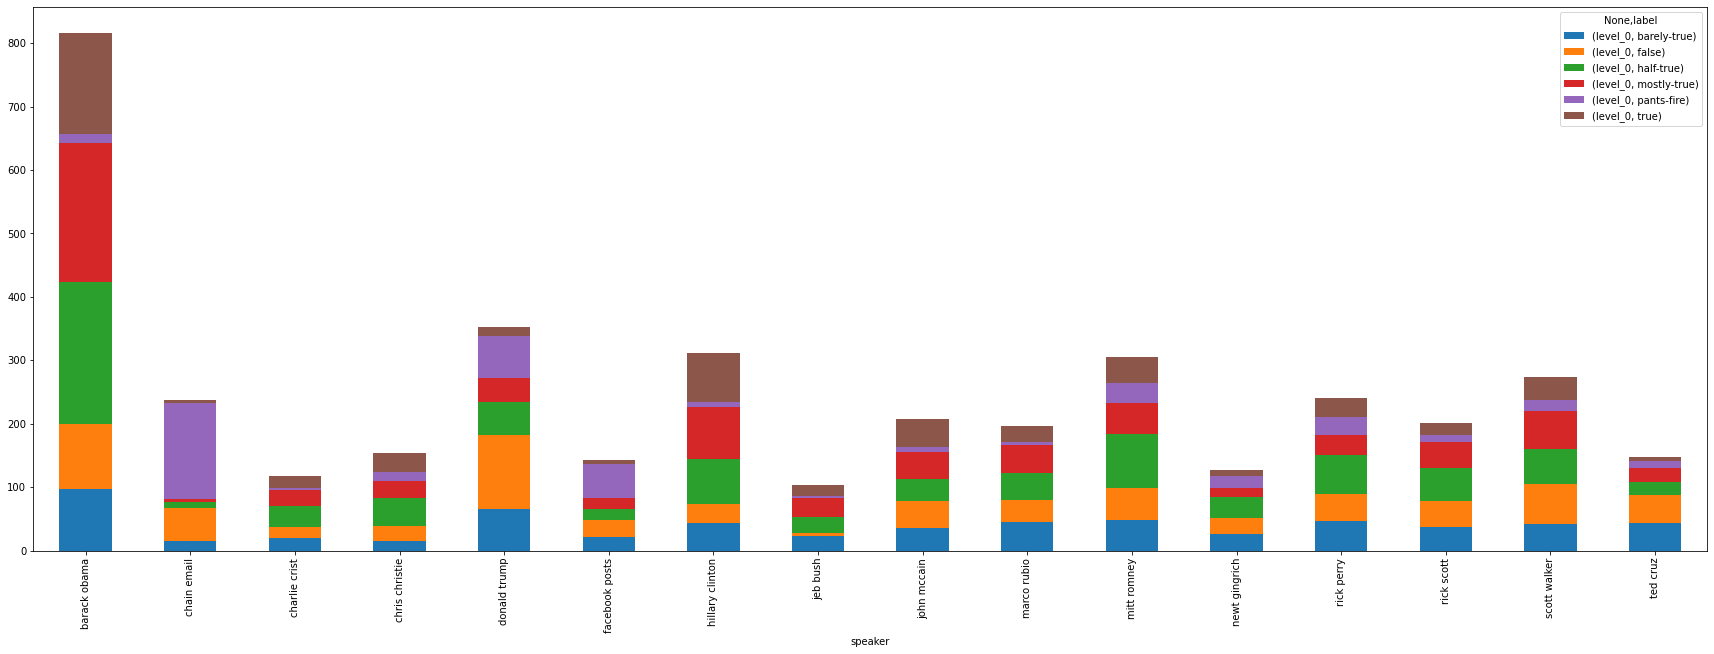

In [82]:
breakdown = class_counts(speakers_data, 'speaker')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(30,10))

In [83]:
def normalize(data, column):
    norm = data.reset_index()
    norm = norm.set_index([column,'label'])['level_0'].unstack(fill_value=0)

    row_totals = norm.sum(axis=1)
    for row in range(len(norm.index)):
        norm.iloc[row]/= row_totals[row]

    norm = norm.stack().reset_index(name='Percent').set_index([column, 'label'])
    return norm

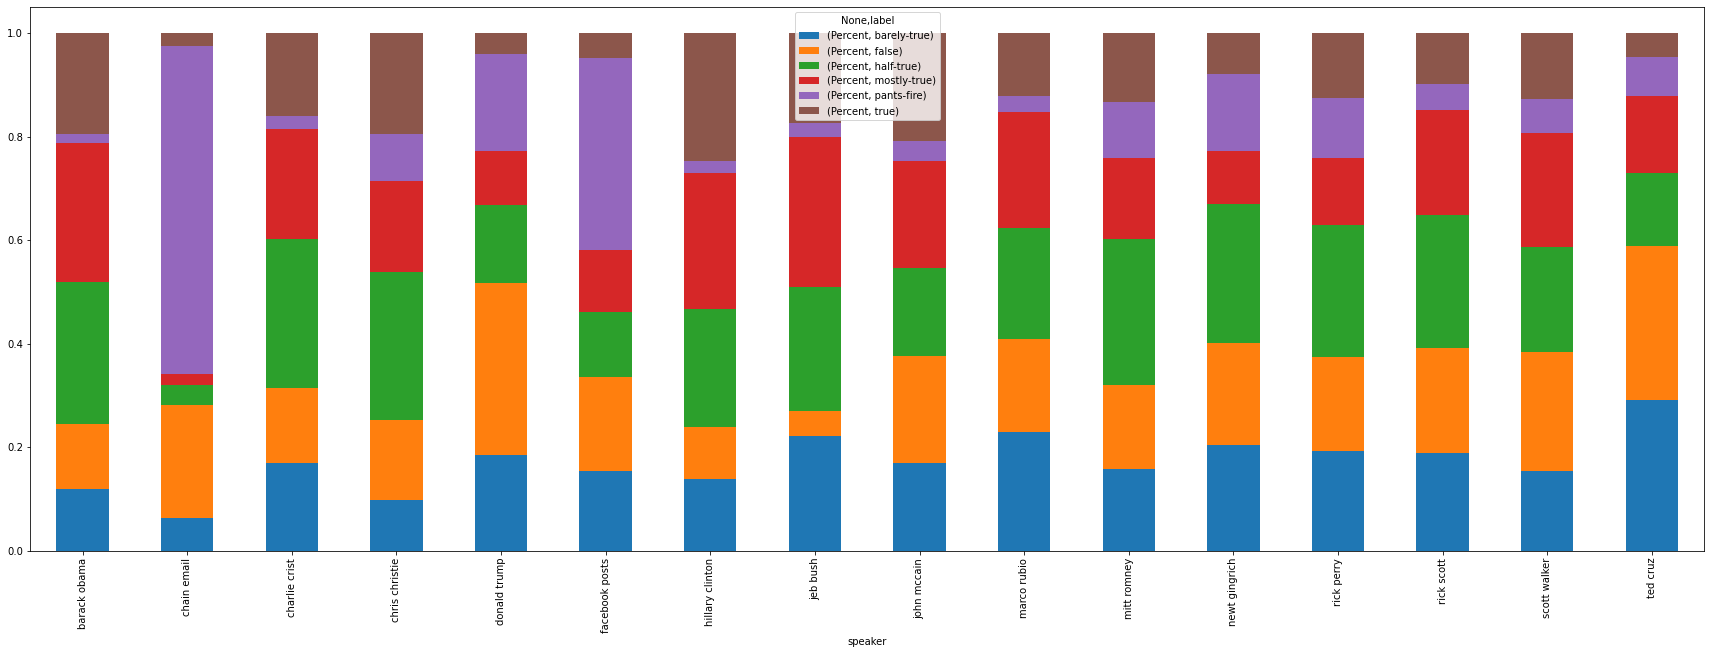

In [84]:
normalised_data = normalize(breakdown, 'speaker')
normalised_data.unstack().plot(kind='bar', stacked=True, figsize=(30,10))

In [89]:
def binary_class_dataset(data):

    Original_labels = {
        'true': 'True',
        'mostly-true': 'True',
        'half-true': 'True',
        'false': 'Fake',
        'barely-true': 'Fake',
        'pants-fire': 'Fake'
    }
    data['label'] = data['label'].map(Original_labels)

    return data

In [90]:
bi_class= binary_class_dataset(df)

In [91]:
bi_class

,text,speaker,label
0,Says the Annies List political group supports ...,dwayne bohac,Fake
1,When did the decline of coal start? It started...,scott surovell,True
2,The economic turnaround started at the end of ...,charlie crist,True
3,The Chicago Bears have had more starting quart...,robin vos,True
4,Jim Dunnam has not lived in the district he re...,republican party texas,Fake
...,...,...,...
17657,"In recent years, Rep. LaTourette has sponsored...",bill o neill,Fake
17658,"91 percent of Latinos support the DREAM Act, w...",presente org,True
17659,Rep. Adam Putnam was silent when Rush Limbaugh...,presente org,Fake
17660,Elorza wants to teach our public school childr...,local 799 of the international assoc of fire f...,Fake
